In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter, FuncFormatter

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\5_Education_Income\working sheet.csv')
df['Year']=pd.to_datetime(df['Year']).dt.year
# Yearly data, so just extract year from date

incomes= {'0': '0',
          '$5,000 to $9,999': '5k-10k',
          '$10,000 to $14,999':'10k-15k',
          '$15,000 to $24,999' :'15k-25k',
          '$25,000 to $34,999' :'25k-35k',
          '$35,000 to $49,999' :'35k-50k',
          '$50,000 to $74,999' :'50k-75k',
          '$75,000 and over' :'75k+'}

#Replace them for better visualization
df['income']=df['Personal Income'].replace(incomes)

#drop the row where no population
df = df.dropna()


sorted =['0', '5k-10k', '10k-15k', '15k-25k', '25k-35k', '35k-50k', '50k-75k','75k+']
deg_sorted= ['No high school diploma','High school or equivalent', 
             'Some college, less than 4-yr degree',"Bachelor's degree or higher"]
sns.set_style('ticks')

- Look up total population by education level for both gender

In [54]:
df_M=df[df['Gender']=='Male']
df_M_piv= df_M.pivot_table(
    aggfunc='sum',values='Population Count', index='Educational Attainment',columns='income'
    ).reindex(sorted, axis=1).reindex(deg_sorted, axis=0).T

df_F=df[df['Gender']=='Female']
df_F_piv= df_F.pivot_table(
    aggfunc='sum',values='Population Count', index='Educational Attainment',columns='income'
    ).reindex(sorted, axis=1).reindex(deg_sorted, axis=0).T

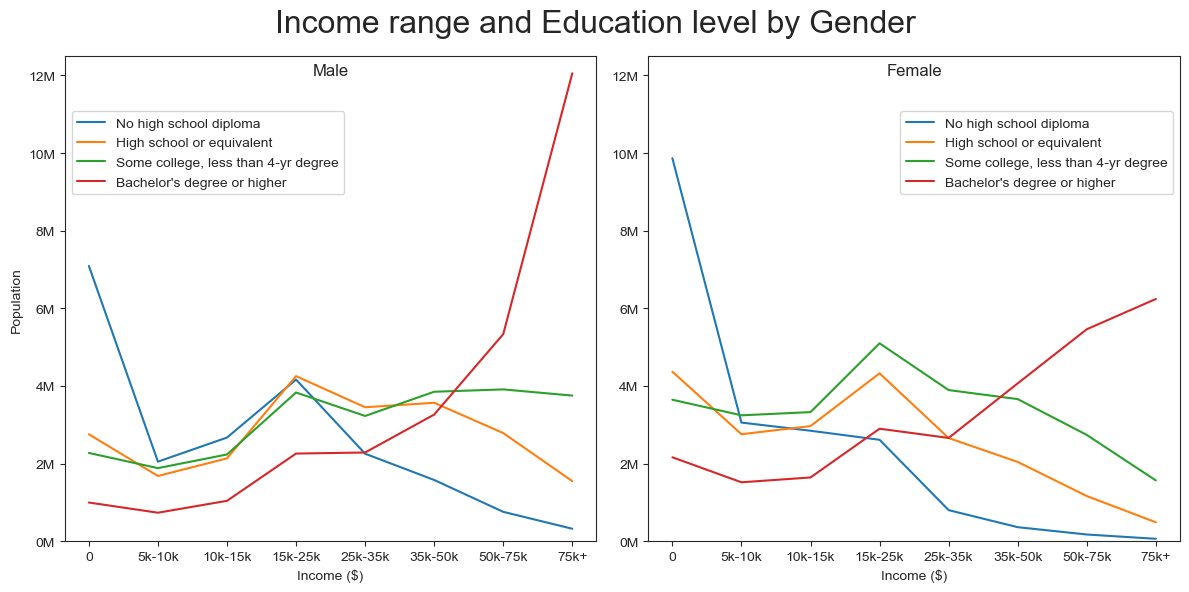

In [56]:
fig,ax= plt.subplots(1,2, figsize=(12,6))

df_M_piv.plot(ax=ax[0])
ax[0].set_ylim(0,12500000)
ax[0].set_title('Male', y=1.0, pad=-14)
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
ax[0].set_ylabel('Population')
ax[0].legend(loc='upper left', bbox_to_anchor=(0, 0.9))
ax[0].set_xlabel('Income ($)')

df_F_piv.plot(ax=ax[1])
ax[1].set_ylim(0,12500000)
ax[1].set_title('Female', y=1.0, pad=-14)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
ax[1].legend(loc='upper right', bbox_to_anchor=(1, 0.9))
ax[1].set_xlabel('Income ($)')
plt.suptitle('Income range and Education level by Gender', fontsize=23)
plt.tight_layout()

### Education level and income by gender

- Similar line chart but male has more population in higher salary and female in lower salary

In [34]:
df_M

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count,income
0,2008,00 to 17,Male,No high school diploma,0,650889.0,0
1,2008,00 to 17,Male,No high school diploma,"$5,000 to $9,999",30152.0,5k-10k
2,2008,00 to 17,Male,No high school diploma,"$10,000 to $14,999",7092.0,10k-15k
3,2008,00 to 17,Male,No high school diploma,"$15,000 to $24,999",3974.0,15k-25k
4,2008,00 to 17,Male,No high school diploma,"$25,000 to $34,999",2606.0,25k-35k
...,...,...,...,...,...,...,...
1010,2014,65 to 80+,Male,Bachelor's degree or higher,"$15,000 to $24,999",103998.0,15k-25k
1011,2014,65 to 80+,Male,Bachelor's degree or higher,"$25,000 to $34,999",74877.0,25k-35k
1012,2014,65 to 80+,Male,Bachelor's degree or higher,"$35,000 to $49,999",120656.0,35k-50k
1013,2014,65 to 80+,Male,Bachelor's degree or higher,"$50,000 to $74,999",154551.0,50k-75k


In [35]:
df_M_piv['sum']=df_M_piv.sum(axis=1)
df_M_total= df_M_piv['sum'].sum()
df_M_piv['percent']= df_M_piv['sum'].div(df_M_total/100)


df_F_piv['sum']=df_F_piv.sum(axis=1)
df_F_total= df_F_piv['sum'].sum()
df_F_piv['percent']= df_F_piv['sum'].div(df_F_total/100)

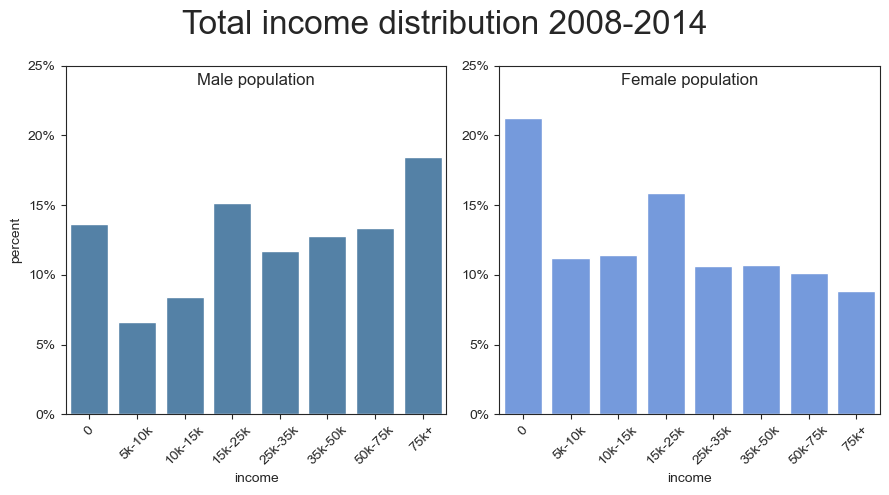

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(9,5) )
import matplotlib.ticker as ticker

sns.barplot(data=df_M_piv['percent'], color='steelblue', ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('Male population', y=1.0, pad=-14)
ax[0].yaxis.set_major_formatter(PercentFormatter(decimals=0))
ax[0].set_ylim(0,25)
#ax[0].xaxis.set_major_locator(ticker.MultipleLocator(3))
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('Income ($)')

sns.barplot(data=df_F_piv['percent'], color='cornflowerblue', ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Female population', y=1.0, pad=-14)
ax[1].yaxis.set_major_formatter(PercentFormatter(decimals=0))
ax[1].set_ylim(0,25)
#ax[1].xaxis.set_major_locator(ticker.MultipleLocator(3))
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel('Income ($)')

plt.suptitle("Total income distribution 2008-2014", fontsize=24)
plt.tight_layout()
plt.show()

- Through out 2008-2014, $0 income was highest distribution of Female personal income.
- Compare to that, $75k+ income was highest distribution of Male personal income.
- Both gender has second highest distribution at $15k-25k.